In [1]:
pwd

'/home/wsuser/work'

# Importing Necessary Libraries

In [2]:
import numpy #used for numerical analysis
import tensorflow as tf#open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from tensorflow.keras import layers #A Layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected n
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from tensorflow.keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt
import numpy as np

# Loading data

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


# Gettting shape of data


In [4]:

print("Shape of training and testing dataset ")
print(x_train.shape)
print(x_test.shape)

Shape of training and testing dataset 
(60000, 28, 28)
(10000, 28, 28)


# Understanding of data


Analyzing the data
Printing the first data and its label
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0  

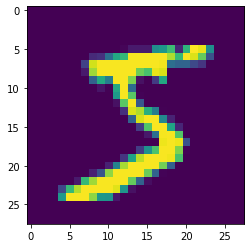

In [5]:

print("Analyzing the data")
print("Printing the first data and its label")
print(x_train[0])
print(y_train[0])
print("Visualising the data ")
plt.imshow(x_train[0])
plt.show()

# Reshaping the data


In [6]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Applying One Hot Encoding && Normalization"


In [7]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Creating the model


In [8]:

model =Sequential()
model.add(Conv2D(64,(3*3),input_shape =(28,28,1),activation='relu' ))
model.add(Conv2D(32,(3*3),activation='relu' ))
model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

# Compiling the model

In [ ]:


model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,validation_split=0.3,batch_size=5)

# Evaluation


In [12]:

test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy: ",test_acc)
print("Test validation  loss: ",test_loss)

313/313 [==============================] - 6s 18ms/step - loss: 0.0827 - accuracy: 0.9847
Test accuracy:  0.9847000241279602
Test validation  loss:  0.08267717063426971


# Testing 


[1.3543255e-21 5.4878523e-16 7.2801753e-19 5.0472089e-15 2.6604361e-09
 9.2844643e-14 9.2869199e-23 7.0519296e-21 1.1336766e-10 1.0000000e+00]
9


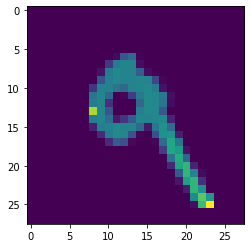

In [14]:
predictions=model.predict([x_test])
print(predictions[7])
print(np.argmax(predictions[7]))
plt.imshow(x_test[7])
plt.show()

# Saving the model


In [15]:


model.save('mnistCNN.h5')
!tar -zcvf hand-written-digit-recognition.tgz mnistCNN.h5


mnistCNN.h5


In [16]:
ls -1

hand-written-digit-recognition.tgz
mnistCNN.h5


# Model Deployment

In [17]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 18.2 MB/s eta 0:00:01


In [18]:
!pip install -U ibm-watson-machine-learning

In [19]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Z3ORdkLxFJQkMbSF0tX5tSpMPsqVWneN9Dv1yySUdaXP"
}
client=APIClient(wml_credentials)

In [20]:
client

In [21]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [22]:
space_uid=guid_from_space_name(client,'HDR')
print("Space UID = "+space_uid)


Space UID = 4024ccc1-8cfc-4173-b292-ffd3b2916684


In [23]:
client.set.default_space(space_uid)

'SUCCESS'

In [9]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [27]:
software_space_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.2-py3.10")
print(software_space_uid)

f65bd165-f057-55de-b5cb-f97cf2c0f393


In [28]:
ls

hand-written-digit-recognition.tgz  mnistCNN.h5


In [29]:
model_details=client.repository.store_model(model='hand-written-digit-recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Model",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.9',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [30]:
model_id=client.repository.get_model_id(model_details)

In [31]:
model_id

'34ed2f6a-1d50-493e-82bb-00c19a768ced'

In [32]:
client.repository.download(model_id,'mnist.tar.gb')

Successfully saved model content to file: 'mnist.tar.gb'


'/home/wsuser/work/mnist.tar.gb'